In [166]:
from word_detector import prepare_img, detect, sort_line
import matplotlib.pyplot as plt
import cv2

import numpy as np

import tensorflow as tf
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from tensorflow.keras.models import load_model

In [181]:
# img = cv2.imread("./WordDetector/data/page/r06-137.png")
img = cv2.imread("test.jpg")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = cv2.imread("./WordDetector/data/line/0.png")
# img = cv2.imread("./RIMES/RIMES-2011-Lines/Images/eval2011-0_000001.jpg")

In [117]:
light = (50, 50, 65)
dark = (170, 255, 255)

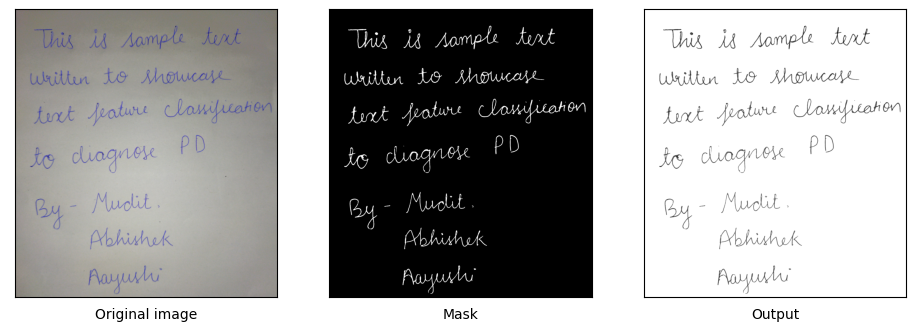

In [182]:
fig = plt.figure(figsize=(11.5, 10))
plt.xticks([])

mask = cv2.inRange(img_hsv, light, dark)
result = cv2.bitwise_and(img, img, mask=mask)

result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
result[result == 0] = 255

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.xlabel("Original image")
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.xlabel("Mask")
plt.subplot(1, 3, 3)
plt.imshow(result, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel("Output")
plt.show()

In [124]:
result.shape

(3235, 2951)

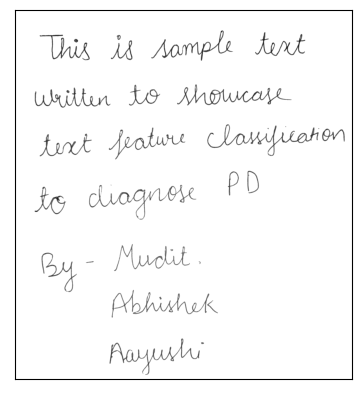

In [183]:
plt.imshow(result, cmap='gray')
plt.xticks([])
plt.yticks([])
# plt.xlabel("Sample text image")
plt.show()

In [126]:
img = prepare_img(result, 3235)

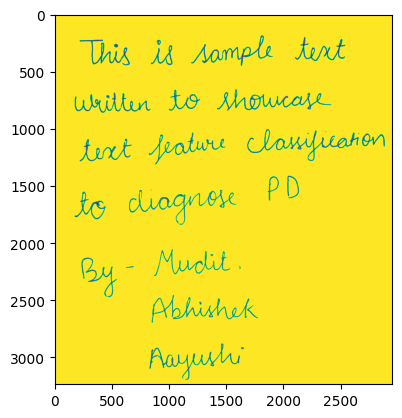

In [127]:
plt.imshow(img)

In [128]:
detections = detect(img,
                    kernel_size=25,
                    sigma=11,
                    theta=7,
                    min_area=100)

In [129]:
line = sort_line(detections)[0]

In [130]:
len(line)

66

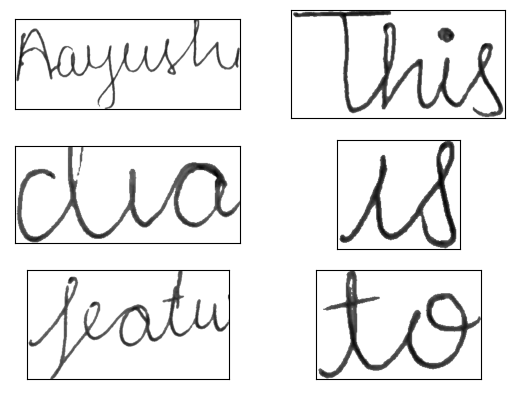

In [178]:


plt.subplot(3, 2, 1)
plt.imshow(line[33].img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 2)
plt.imshow(line[7].img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 3)
plt.imshow(line[16].img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 4)
plt.imshow(line[21].img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 5)
plt.imshow(line[25].img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(3, 2, 6)
plt.imshow(line[30].img, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()

BBox(x=991, y=663, w=278, h=183)
BBox(x=1156, y=747, w=73, h=71)
BBox(x=1190, y=714, w=41, h=42)
BBox(x=821, y=2881, w=796, h=318)


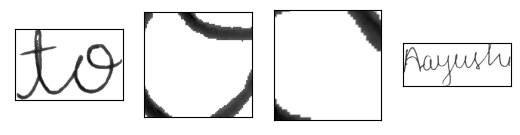

In [150]:
# plt.subplot(4, 1, 1)
# plt.imshow(img, cmap='gray')
# plt.xticks([])
# plt.yticks([])
k = 30
for i, word in enumerate(line[k:k+4]):
    print(word.bbox)
    plt.subplot(1, 4, i + 1)
    plt.imshow(word.img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [156]:
def split_chunks(img):
    output = []
    chunk_size = 128
    
    if img.shape[0] < 128 or img.shape[1] < 128:
        return []
    
    for y in range(0, img.shape[0], chunk_size):
        for x in range(0, img.shape[1], chunk_size):
            if y + chunk_size <= img.shape[0] and x + chunk_size <= img.shape[1]:
                chunk = img[y:y+chunk_size, x:x+chunk_size]
                if cv2.countNonZero(chunk)  < 2*chunk_size:
                    continue
                    
                output.append(chunk)
    
    return output

In [159]:
model = Sequential()

model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(128,128,1)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (5,5), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (5,5), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [162]:
model = load_model('models/imageclassifier_5.h5', compile=False)

In [174]:
total = 0
pd = 0

for word in line:
    for chunk in split_chunks(word.img):
        total += 1
        if model.predict(np.expand_dims(chunk/255, 0))[0][0] > 0.5:
            pd += 1

1/1 [==============================] - 0s 64ms/step


In [175]:
if pd/total > 0.5:
    print("Negative diagnosis")
else:
    print("Positive diagnosis")

Negative diagnosis
